In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
from sklearn import preprocessing

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [8]:
import tensorflow as tf

In [13]:
import keras

In [14]:
from keras.utils.np_utils import to_categorical

In [15]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('acc')>1.0):
            print('\n cancelling training!')
            self.model.stop_training=True

In [16]:
callbacks=myCallback()
data_train=pd.read_csv("train.csv")
x_test=pd.read_csv("test.csv")
x_train=data_train.iloc[:,1:]

#normalizing the training and testing data
x_train,x_test=x_train/255,x_test/255
y_train=data_train.iloc[:,0]

XTest1=x_test.values.reshape(x_test.shape[0],28,28)
#reshaping the training and testing data
XTrain = x_train.values.reshape(x_train.shape[0],28,28,1)
XTest = x_test.values.reshape(x_test.shape[0],28,28,1)

#converting to float type
#XTrain=XTrain.values.astype('float32')
#XTest=XTest.values.astype('float32')
YTrain=y_train.values.astype('int32')

#relabeling as one hot
#YTrain=y_train
#YTrain = to_categorical(y_train)

In [18]:
model=keras.Sequential([keras.layers.Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu'),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Conv2D(64,(3,3),activation='relu'),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Flatten(),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation=tf.nn.softmax)])
#using sparse_categorical_crossentropy as the labels are integers
#if labels are one hot encoded then use categorical_crossentropy
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(XTrain,YTrain,epochs=20,callbacks=[callbacks])

Epoch 1/20
42000/42000 [==============================] - 21s 500us/step - loss: 0.1641 - acc: 0.9509
Epoch 2/20
42000/42000 [==============================] - 21s 512us/step - loss: 0.0533 - acc: 0.9836
Epoch 3/20
42000/42000 [==============================] - 22s 513us/step - loss: 0.0351 - acc: 0.9887
Epoch 4/20
42000/42000 [==============================] - 21s 508us/step - loss: 0.0269 - acc: 0.9908
Epoch 5/20
42000/42000 [==============================] - 20s 487us/step - loss: 0.0194 - acc: 0.9938
Epoch 6/20
42000/42000 [==============================] - 24s 583us/step - loss: 0.0157 - acc: 0.9953
Epoch 7/20
42000/42000 [==============================] - 27s 641us/step - loss: 0.0113 - acc: 0.99600s - loss: 0.01
Epoch 8/20
42000/42000 [==============================] - 25s 594us/step - loss: 0.0104 - acc: 0.9970
Epoch 9/20
42000/42000 [==============================] - 20s 487us/step - loss: 0.0073 - acc: 0.9977
Epoch 10/20
42000/42000 [==============================] - 21s 498u

In [19]:
predictions_p=model.predict(XTest)
labels1=predictions_p.argmax(axis=-1)
print(predictions_p.shape)
#predictions_l=model.evaluate(XTrain,YTrain)

(28000, 10)


In [20]:
ind=0
print(labels1[ind])
#print(predictions_l)

2


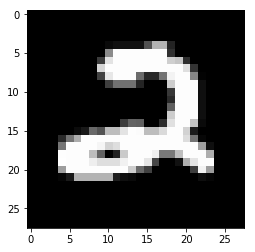

In [22]:
import matplotlib.pyplot as plt
plt.imshow(XTest1[ind],cmap=plt.get_cmap('gray'))
#plt.title(YTrain[0])